In [1]:
%matplotlib inline
import quantstats as qs

# extend pandas functionality with metrics, etc.
qs.extend_pandas()

In [2]:
import pandas as pd

# Salva i metodi originali
_original_series_resample = pd.Series.resample
_original_dataframe_resample = pd.DataFrame.resample

def patched_series_resample(self, rule, *args, **kwargs):
    if rule == "YE":
        rule = "Y"
    elif rule == "ME":
        rule = "M"
    elif rule == "QE":
        rule = "Q"
    return _original_series_resample(self, rule, *args, **kwargs)

def patched_dataframe_resample(self, rule, *args, **kwargs):
    if rule == "YE":
        rule = "Y"
    elif rule == "ME":
        rule = "M"
    elif rule == "QE":
        rule = "Q"
    return _original_dataframe_resample(self, rule, *args, **kwargs)

pd.Series.resample = patched_series_resample
pd.DataFrame.resample = patched_dataframe_resample

In [ ]:
# import pandas as pd
from pandas.core.resample import Resampler

# Patch per evitare axis=0 su Resampler.sum()
_original_resampler_sum = Resampler.sum

def patched_resampler_sum(self, *args, **kwargs):
    # Rimuovi axis se presente e chiama sum senza argomenti
    kwargs.pop('axis', None)
    return _original_resampler_sum(self, *args, **kwargs)

Resampler.sum = patched_resampler_sum

In [ ]:
URL = r'C:\Users\........................\daily_returns_spy.csv'
URL2 = r'C:\Users\........................\daily_returns_strategies.csv'

daily_returns_spy = pd.read_csv(URL, index_col=0, parse_dates=True, sep=';')
daily_returns_strategies = pd.read_csv(URL2, index_col=0, parse_dates=True, sep=';')

In [5]:
# rename the columns
daily_returns_spy.columns = ['daily_returns_spy']
daily_returns_strategies.columns = ['daily_returns_strategies']

In [6]:
# daily_returns_spy
# daily_returns_strategies

In [7]:
# merge the two dataframes on the index
merged_df = pd.merge(daily_returns_spy, daily_returns_strategies, left_index=True, right_index=True)

# drop na values
merged_df = merged_df.dropna()

merged_df

,daily_returns_spy,daily_returns_strategies
Date,,
2023-04-20,-0.005457,-0.000608
2023-04-21,0.000777,0.005311
2023-04-24,0.001043,-0.008359
2023-04-26,-0.004236,0.058964
2023-04-28,0.008535,0.000215
...,...,...
2025-05-08,0.006968,-0.005977
2025-05-09,-0.001274,0.001478
2025-05-12,0.033047,-0.002273


In [8]:
merged_df.sample(10)

,daily_returns_spy,daily_returns_strategies
Date,,
2024-05-22,-0.002879,-0.000389
2024-09-03,-0.020579,-0.007319
2024-06-26,0.001248,0.002185
2024-04-25,-0.003799,0.003666
2023-12-18,0.005625,0.000112
2024-09-25,-0.002205,0.012561
2025-04-21,-0.023803,0.000580
2023-08-08,-0.004349,-0.013603
2025-03-31,0.006713,0.013966


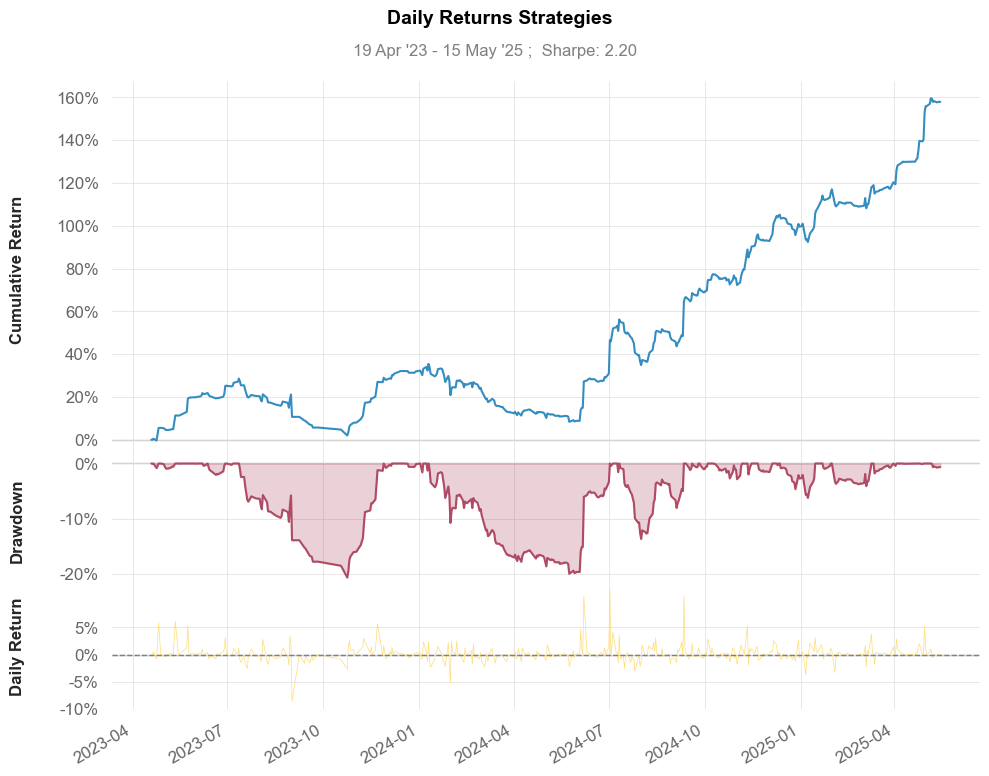

In [9]:
# plot daily_returns_strategies
qs.plots.snapshot(merged_df['daily_returns_strategies'], title='Daily Returns Strategies', show=True)


In [10]:
# shows basic/full metrics
qs.reports.metrics(benchmark=merged_df['daily_returns_spy'],
                   returns=merged_df['daily_returns_strategies'],
                   mode='basic',
                   title='Daily Returns Strategies',
                   display=True,
                   download=True,
                   output='daily_returns_strategies.html')

                    Benchmark    Strategy
------------------  -----------  ----------
Start Period        2023-04-20   2023-04-20
End Period          2025-05-15   2025-05-15
Risk-Free Rate      0.0%         0.0%
Time in Market      100.0%       100.0%

Cumulative Return   48.22%       157.91%
CAGR﹪              14.02%       37.14%

Sharpe              1.38         2.2
Prob. Sharpe Ratio  97.2%        99.96%
Sortino             2.1          4.4
Sortino/√2          1.48         3.11
Omega               1.67         1.67

Max Drawdown        -19.86%      -20.68%
Longest DD Days     85           173

Gain/Pain Ratio     0.31         0.67
Gain/Pain (1M)      2.04         2.38

Payoff Ratio        1.09         1.44
Profit Factor       1.31         1.67
Common Sense Ratio  1.26         2.69
CPC Index           0.85         1.3
Tail Ratio          0.97         1.61
Outlier Win Ratio   6.02         3.88
Outlier Loss Ratio  3.81         3.88

MTD                 5.78%        1.91%
3M            

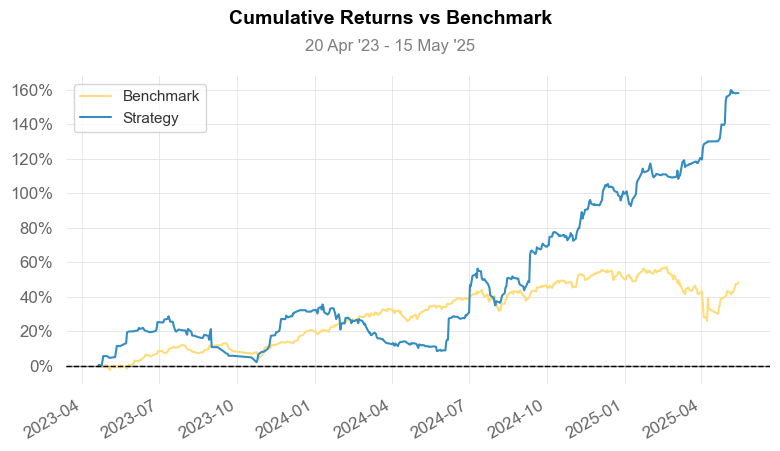

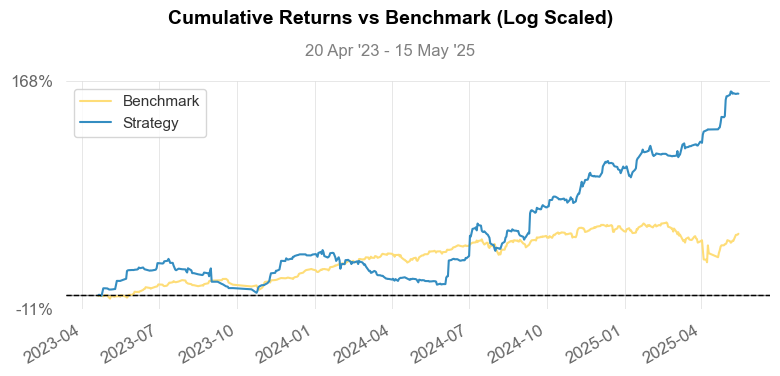

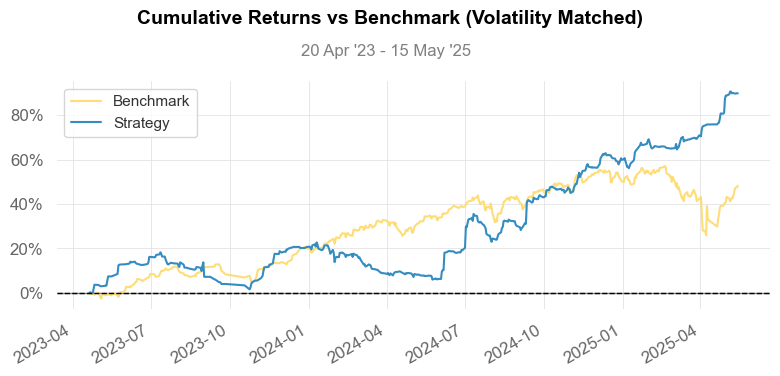

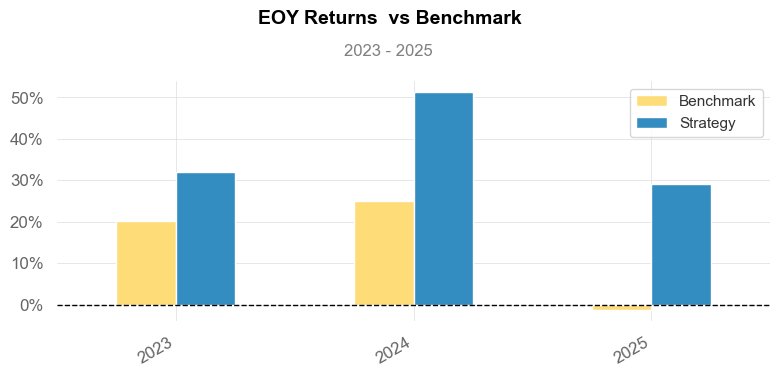

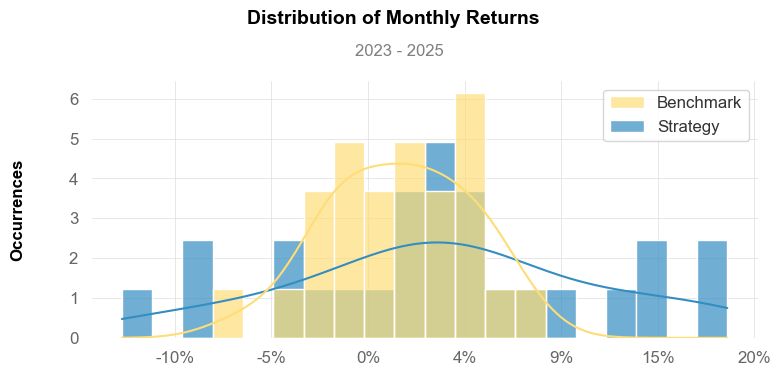

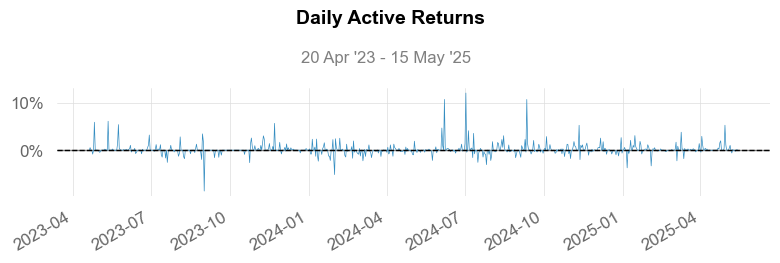

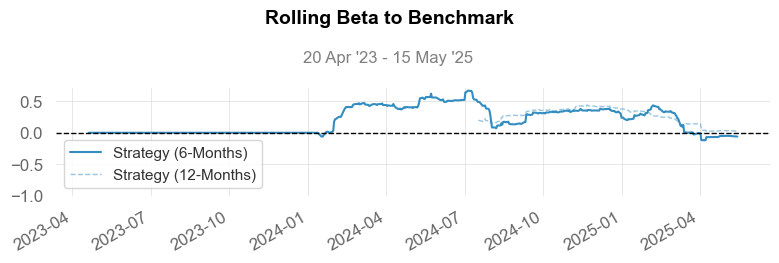

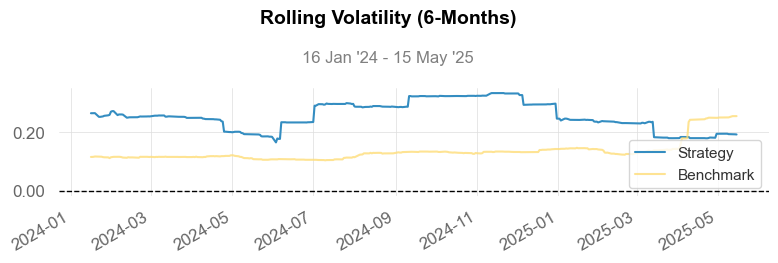

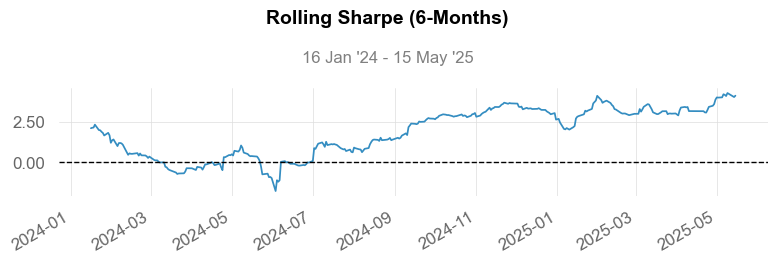

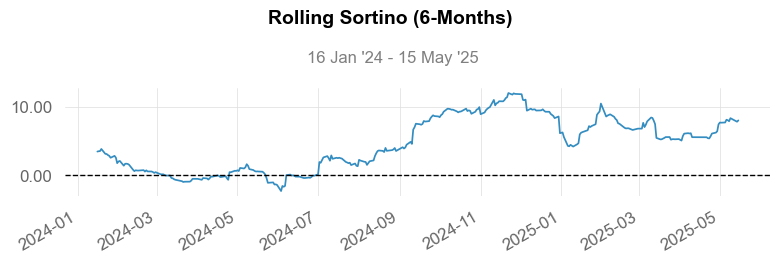

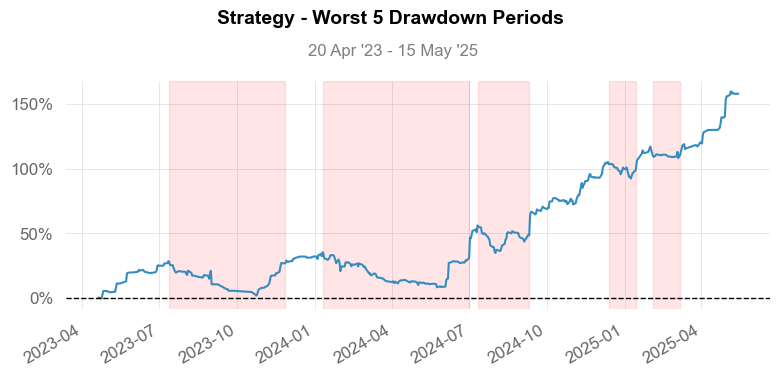

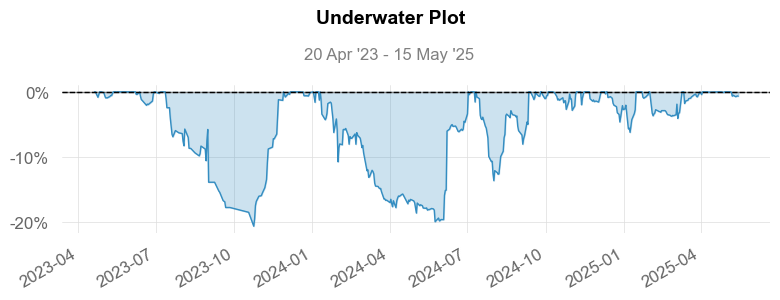

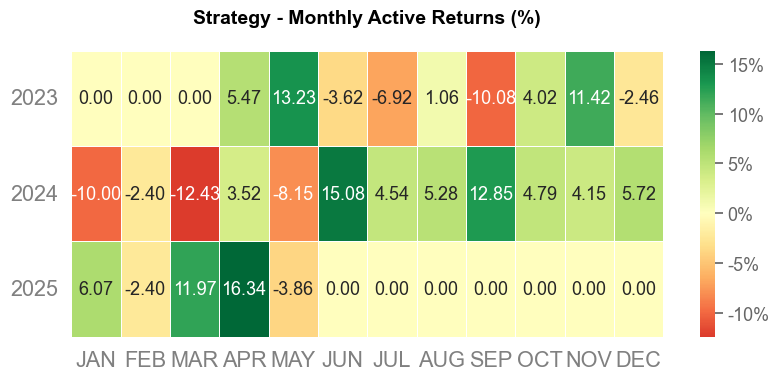

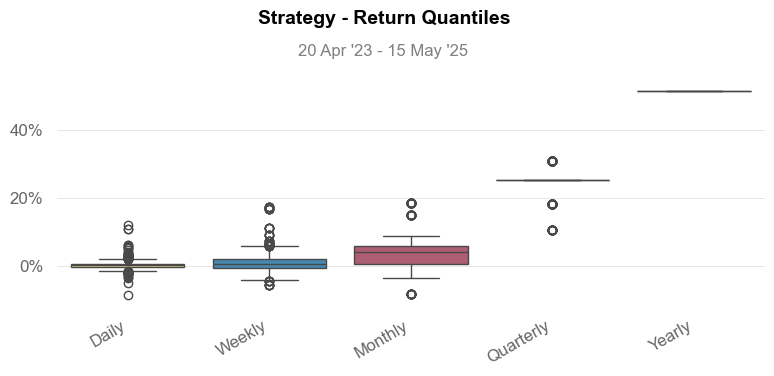

In [11]:
# shows basic/full plots
qs.reports.plots(returns=merged_df['daily_returns_strategies'],
                  benchmark=merged_df['daily_returns_spy'],
                  mode='full',
                  title='Daily Returns Strategies',
                  display=True,
                  download=True,
                  output='daily_returns_strategies.html')

                    Benchmark    Strategy
------------------  -----------  ----------
Start Period        2023-04-20   2023-04-20
End Period          2025-05-15   2025-05-15
Risk-Free Rate      0.0%         0.0%
Time in Market      100.0%       100.0%

Cumulative Return   48.22%       157.91%
CAGR﹪              14.02%       37.14%

Sharpe              1.38         2.2
Prob. Sharpe Ratio  97.2%        99.96%
Sortino             2.1          4.4
Sortino/√2          1.48         3.11
Omega               1.67         1.67

Max Drawdown        -19.86%      -20.68%
Longest DD Days     85           173

Gain/Pain Ratio     0.31         0.67
Gain/Pain (1M)      2.04         2.38

Payoff Ratio        1.09         1.44
Profit Factor       1.31         1.67
Common Sense Ratio  1.26         2.69
CPC Index           0.85         1.3
Tail Ratio          0.97         1.61
Outlier Win Ratio   6.02         3.88
Outlier Loss Ratio  3.81         3.88

MTD                 5.78%        1.91%
3M            

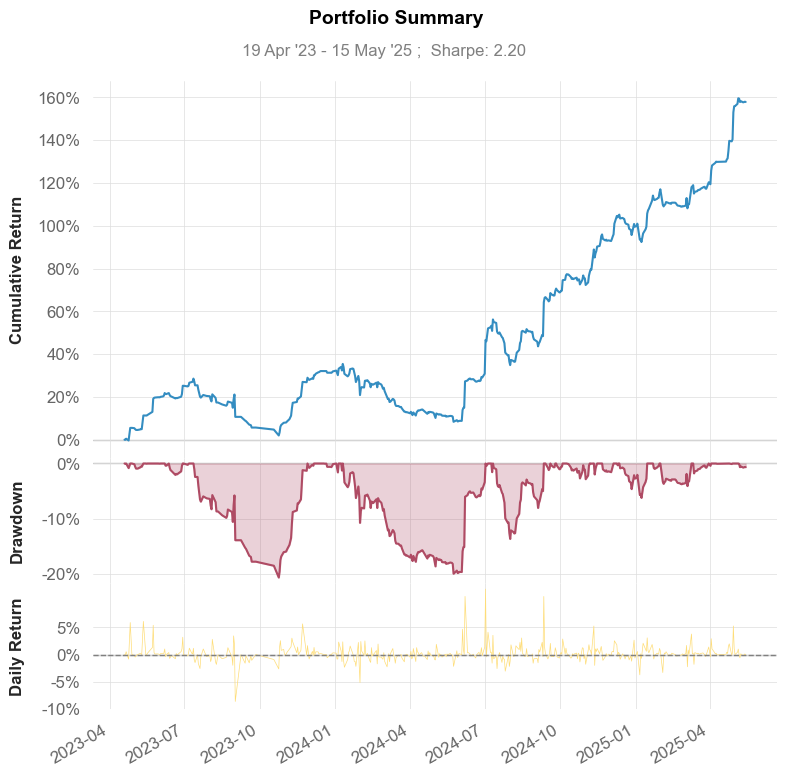

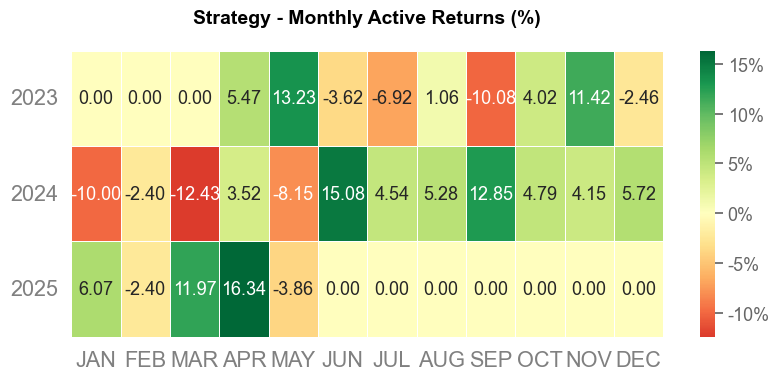

In [12]:
# shows basic metrics and plots
qs.reports.basic(returns=merged_df['daily_returns_strategies'],
                  benchmark=merged_df['daily_returns_spy'],
                  mode='basic',
                  title='Daily Returns Strategies',
                  display=True,
                  download=True,
                  output='daily_returns_strategies.html')

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2023-04-20   2023-04-20
End Period                 2025-05-15   2025-05-15
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          48.22%       157.91%
CAGR﹪                     14.02%       37.14%

Sharpe                     1.38         2.2
Prob. Sharpe Ratio         97.2%        99.96%
Smart Sharpe               1.35         2.14
Sortino                    2.1          4.4
Smart Sortino              2.04         4.29
Sortino/√2                 1.48         3.11
Smart Sortino/√2           1.44         3.03
Omega                      1.67         1.67

Max Drawdown               -19.86%      -20.68%
Longest DD Days            85           173
Volatility (ann.)          16.88%       25.46%
R^2                        0.0          0.0
Information Ratio          0.07         0.07
Calmar               

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2023-07-13,2023-10-24,2023-11-27,138,-20.682005,-19.569475
2,2024-01-11,2024-05-24,2024-07-01,173,-19.986515,-19.791588
3,2024-07-12,2024-08-01,2024-09-10,61,-13.675886,-12.686537
4,2024-12-13,2025-01-08,2025-01-14,33,-6.238482,-5.699320
5,2025-02-03,2025-03-05,2025-03-07,33,-4.094884,-3.758308


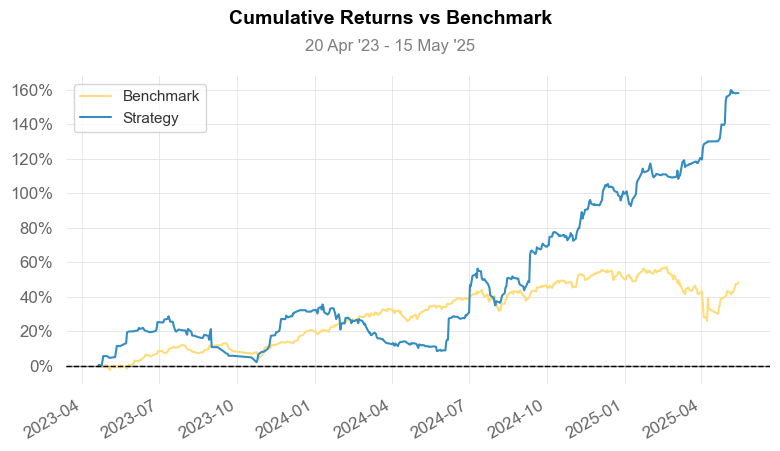

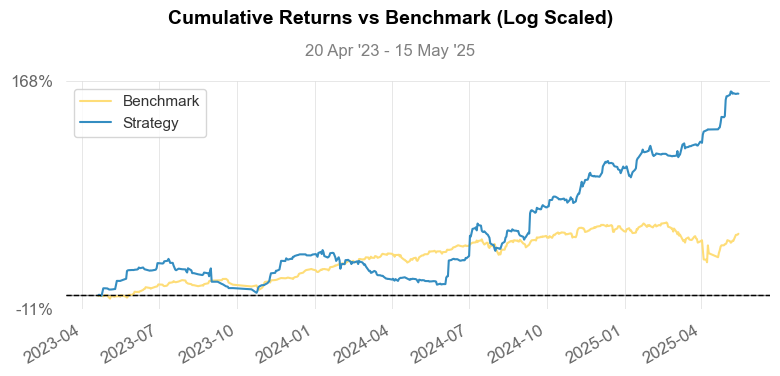

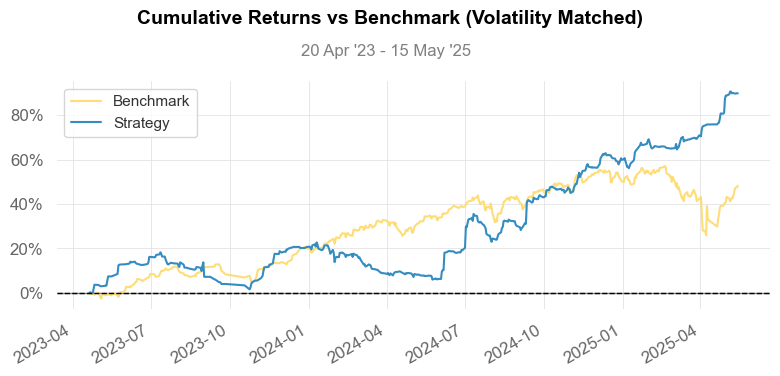

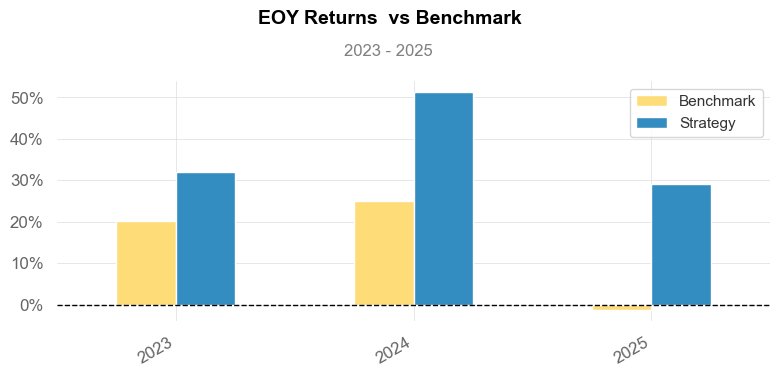

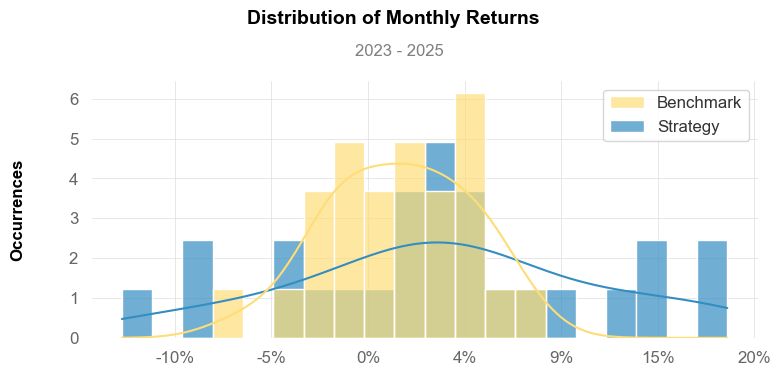

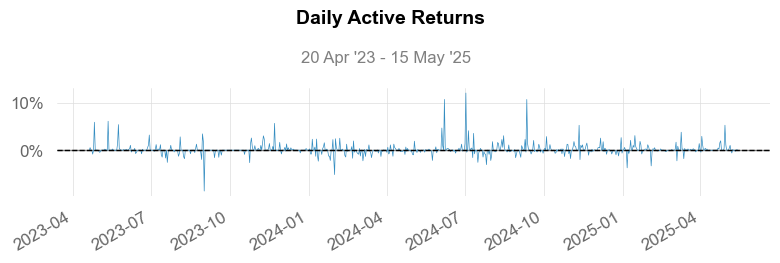

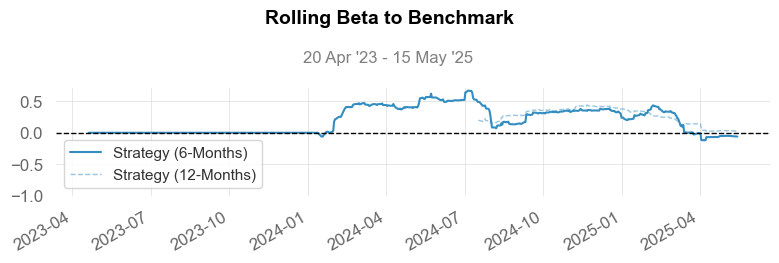

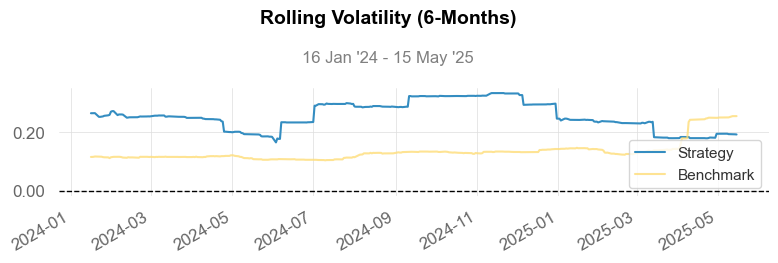

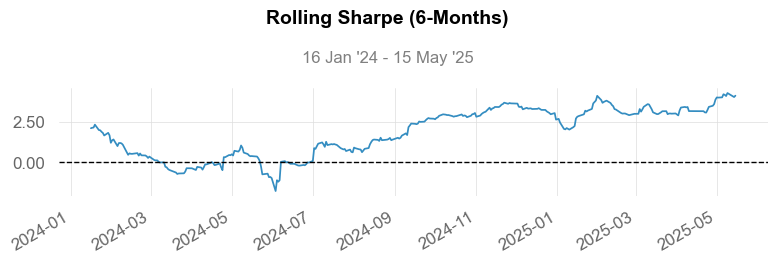

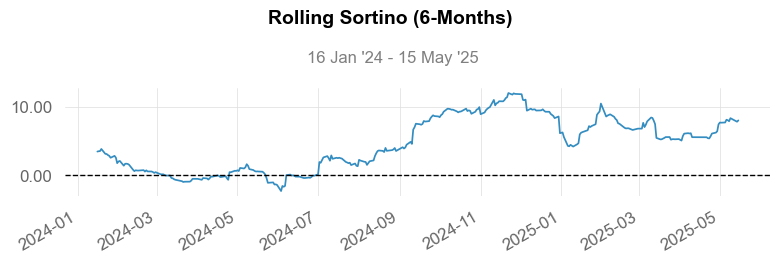

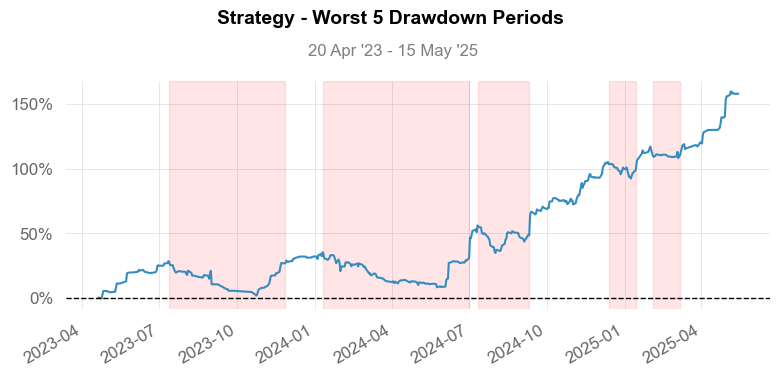

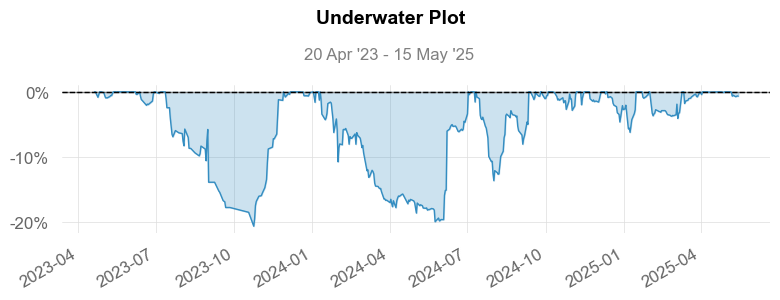

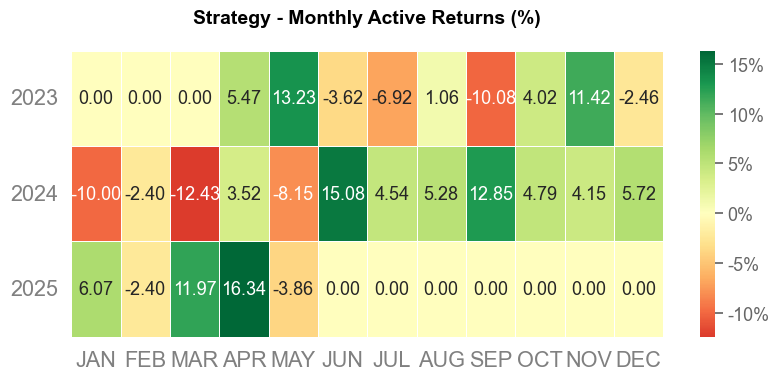

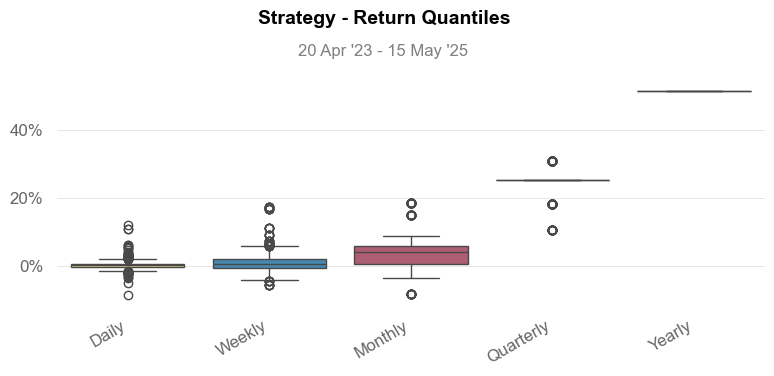

In [13]:
# shows full metrics and plots
qs.reports.full(returns=merged_df['daily_returns_strategies'],
                  benchmark=merged_df['daily_returns_spy'],
                  mode='full',
                  title='Daily Returns Strategies',
                  display=True,
                  download=True,
                  output='daily_returns_strategies.html')

In [14]:
# generates a complete report as html
qs.reports.html(returns=merged_df['daily_returns_strategies'],
                 benchmark=merged_df['daily_returns_spy'],
                 title='Daily Returns Strategies',
                 display=True,
                 download=True,
                 output='daily_returns_strategies.html')